# 정적 시각화 실습 - <span style="background-color:#F1F8FF">seaborn</span> 활용

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn 시각화 & 데이터셋

In [3]:
sns.get_dataset_names() # seaborn에 내장된 데이터셋들의 목록

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
df = sns.load_dataset('iris') # iri 붓꽃 데이터셋 로딩
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

변수 설명:

 * <span style="background-color:#F1F8FF">sepal_length</span>: 꽃받침 길이
 * <span style="background-color:#F1F8FF">sepal_width</span>: 꽃받침 너비
 * <span style="background-color:#F1F8FF">petal_length</span>: 꽃잎 길이
 * <span style="background-color:#F1F8FF">petal_width</span>: 꽃잎 너비

## <span style="background-color:#F1F8FF">seaborn</span>의 <span style="background-color:#F1F8FF">scatterplot</span>, <span style="background-color:#F1F8FF">regplot</span>, 그리고 <span style="background-color:#F1F8FF">lmplot</span>
산점도(<span style="background-color:#F1F8FF">scatterplot</span>)는 수치형 변수 간의 관계를 쉽게 파악할 수 있는 시각화 방법

<span style="background-color:#F1F8FF">seaborn</span>의 <span style="background-color:#F1F8FF">scatterplot</span>, <span style="background-color:#F1F8FF">regplot</span>, <span style="background-color:#F1F8FF">lmplot</span>은 모두 산점도에 기반한다는 공통점이 있음

### 산점도: <span style="background-color:#F1F8FF">scatterplot</span>

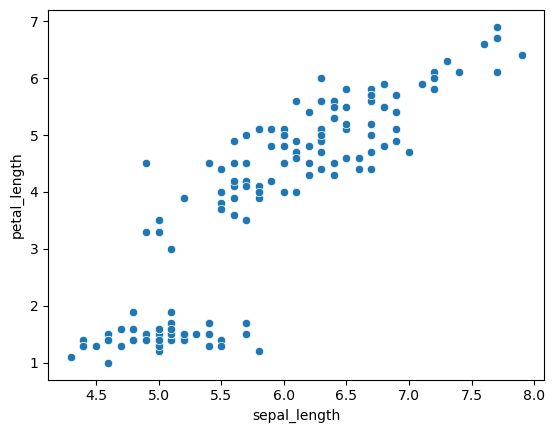

In [8]:
# scatterplot은 총 2개의 수치형 변수 x와 y가 필요

sns.scatterplot(x='sepal_length', y='petal_length', data=df)
# plt.savefig('iris_scatter_seaborn.png')
plt.show()

#### <span style="background-color:#F1F8FF">scatterplot</span>의 <span style="background-color:#F1F8FF">hue</span> 옵션

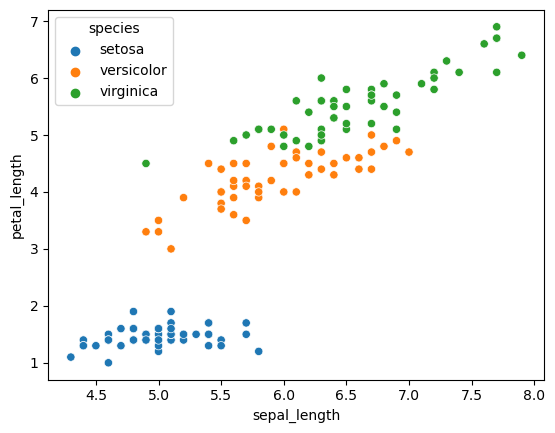

In [9]:
# hue 인수의 값 설정 시, 여러 종류의 데이터를 여러 색상으로 나타낼 수 있음
# 붓꽃 종류별로 다른 색상을 나타내고 싶다면, hue 인수값으로 'species'(범주형 변수)로 설정
sns.scatterplot(x='sepal_length', y='petal_length',hue='species', data=df)
plt.show()

#### <span style="background-color:#F1F8FF">scatterplot</span>의 <span style="background-color:#F1F8FF">marker</span> & <span style="background-color:#F1F8FF">alpha</span> 옵션

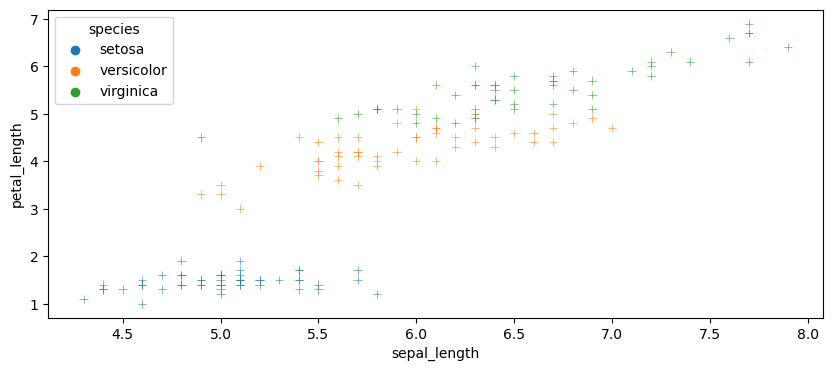

In [10]:
plt.figure(figsize=(10, 4))
sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue='species',
    marker='+', # 점의 모양
    alpha=0.8, # 투명도 설정 0 ~ 1
    data=df
)

plt.show()

### 산점도 & 추세선: <span style="background-color:#F1F8FF">regplot</span>
<span style="background-color:#F1F8FF">regplot</span>도 산점도에 기반

<span style="background-color:#F1F8FF">scatterplot</span>과 다른 점으로는, <span style="background-color:#F1F8FF">regplot</span>을 이용하면 추세선과 추세선의 신뢰구간(confidence interval)을 넣을 수 있다.

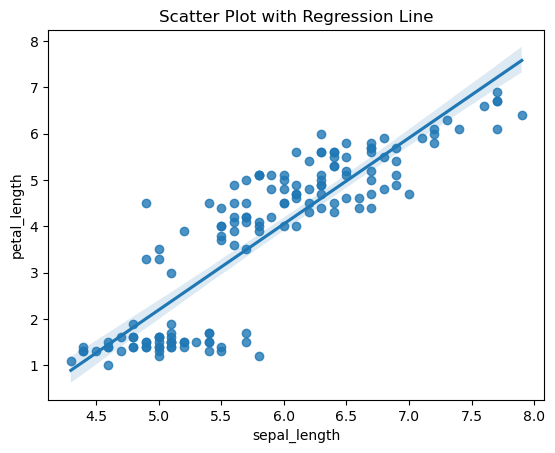

In [11]:
# regplot 호출
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

#### 신뢰구간 제거: <span style="background-color:#F1F8FF">ci</span> 인수

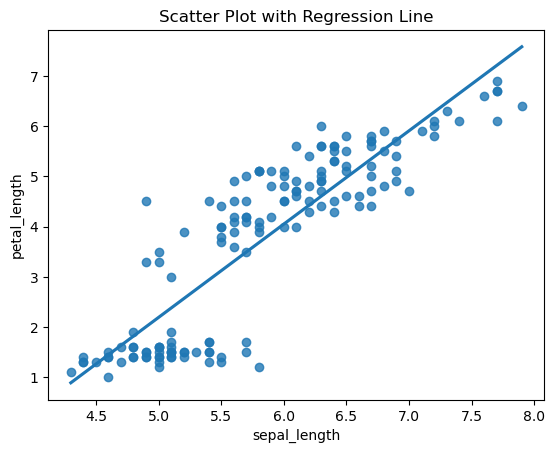

In [12]:
sns.regplot(x='sepal_length', y='petal_length', ci=None, data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

In [13]:
sns.regplot(x='sepal_length', y='petal_length',hue='species', ci=None, data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

# regplot은 hue 인자값이 없어서 오류가 발생

TypeError: regplot() got an unexpected keyword argument 'hue'

### 범주별 산점도 & 추세선: <span style="background-color:#F1F8FF">lmplot</span>

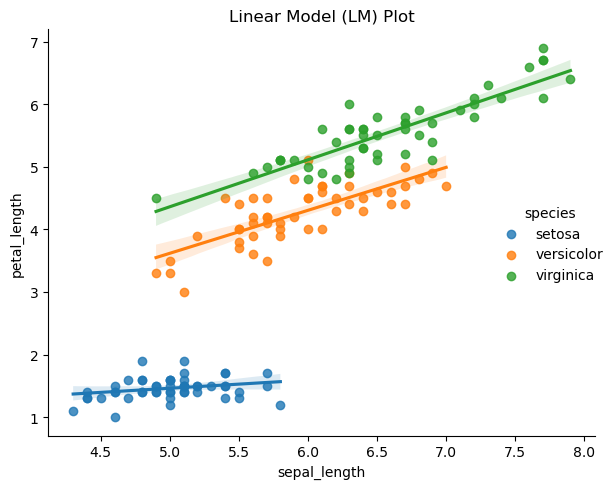

In [14]:
sns.lmplot(x='sepal_length', y='petal_length',hue='species', data=df) # hue 인수 추가 가능
plt.title('Linear Model (LM) Plot')
plt.tight_layout()
plt.show()

## 점도표 : <span style="background-color:#F1F8FF">rugplot</span> 

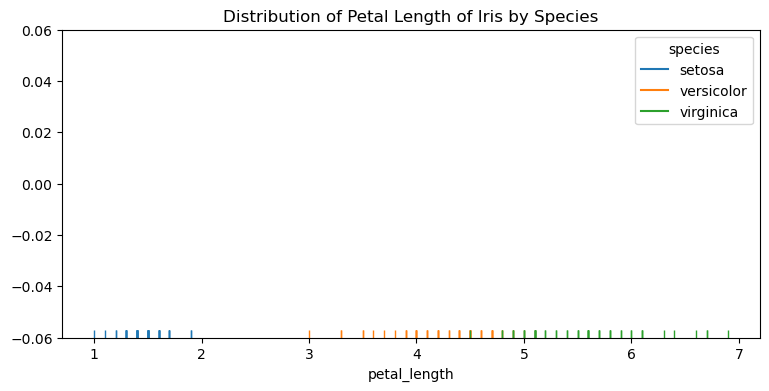

In [15]:
plt.figure(figsize=(9, 4))
sns.rugplot(x='petal_length', hue='species', data=df)
plt.title('Distribution of Petal Length of Iris by Species')
plt.show()

만약 matplotlib으로 구현 시, 아래와 같이 복잡함<br>

...<br>
setosa = df[ df['species'] == 'setosa' ]<br>
virginica = df[ df['species'] == 'virginica' ]<br>
versicolor = df[ df['species'] == 'versicolor']<br><br>
\# y값을 모두 0으로 설정하기 위해 0으로 구성된 길이 50의 array 생성<br>
setosa_zeroes = np.zeros_like(setosa['sepal_length'])<br>
virginica_zeroes = np.zeros_like(virginica['sepal_length'])<br>
versicolor_zeroes = np.zeros_like(versicolor['sepal_length'])<br><br><br><br>
\# 각 ax에 그래프 그리기<br>
\## sepal.length<br>
ax1.plot(setosa['sepal_length'], setosa_zeroes, 'ro', label='setosa') # setosa는 빨간색<br>
ax1.plot(virginica['sepal_length'], virginica_zeroes, 'go', label='virginica') # virginica는 초록색<br>
ax1.plot(versicolor['sepal_length'], versicolor_zeroes, 'bo', label='versicolor') # versicolor는 파란색<br>
ax1.set_title('Sepal Length by Setosa, Virginica, Versicolor', fontsize=14)<br>
ax1.legend()<br>
ax1.get_yaxis().set_visible(False) # y축 숨김 처리<br>
...<br><br>
이렇듯 <span style="background-color:#F1F8FF">seaborn</span>은 쉽고 간편하게 사용 가능

## 단변량 다변량 시각화: <span style="background-color:#F1F8FF">pairplot</span> 

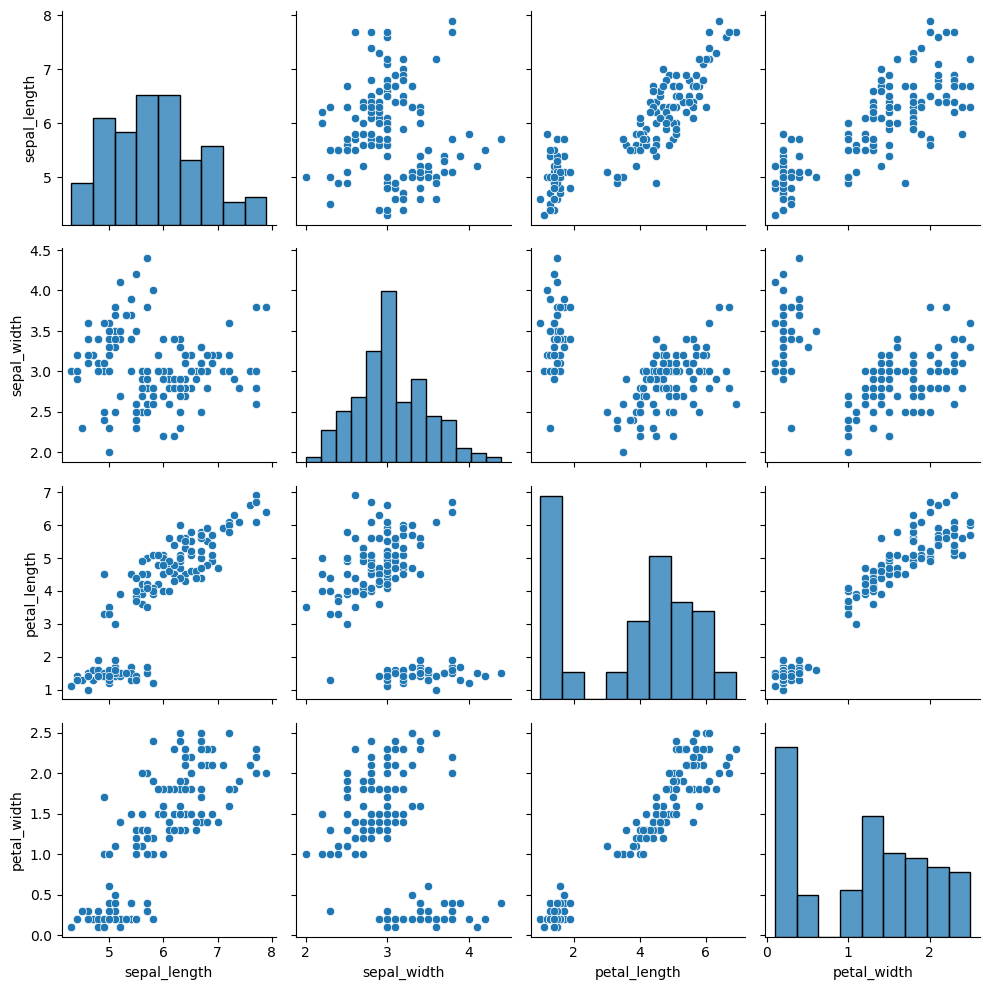

In [18]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

seaborn의 pairplot을 사용하면 붓꽃 데이터의 범주에 따른 산점도 & 막대 그래프 데이터를 한 눈에 확인 가능함

<span style="background-color:#F1F8FF">pairplot</span>은 대상 데이터 프레임(여기서는 <span style="background-color:#F1F8FF">df</span> )의 __실수형 변수__ 만 골라서 분포도를 뽑아내는 기능을 가지고 있음

하지만 <span style="background-color:#F1F8FF">pairplot</span>으로 시각화하고자 하는 변수가 점점 늘어난다면 결과를 받아오는데까지 오랜 시간이 걸리고 figure 크기의 한계로 인한 가독성이 문제가 됨

### 범주별 <span style="background-color:#F1F8FF">pairplot</span>: <span style="background-color:#F1F8FF">hue</span> 옵션

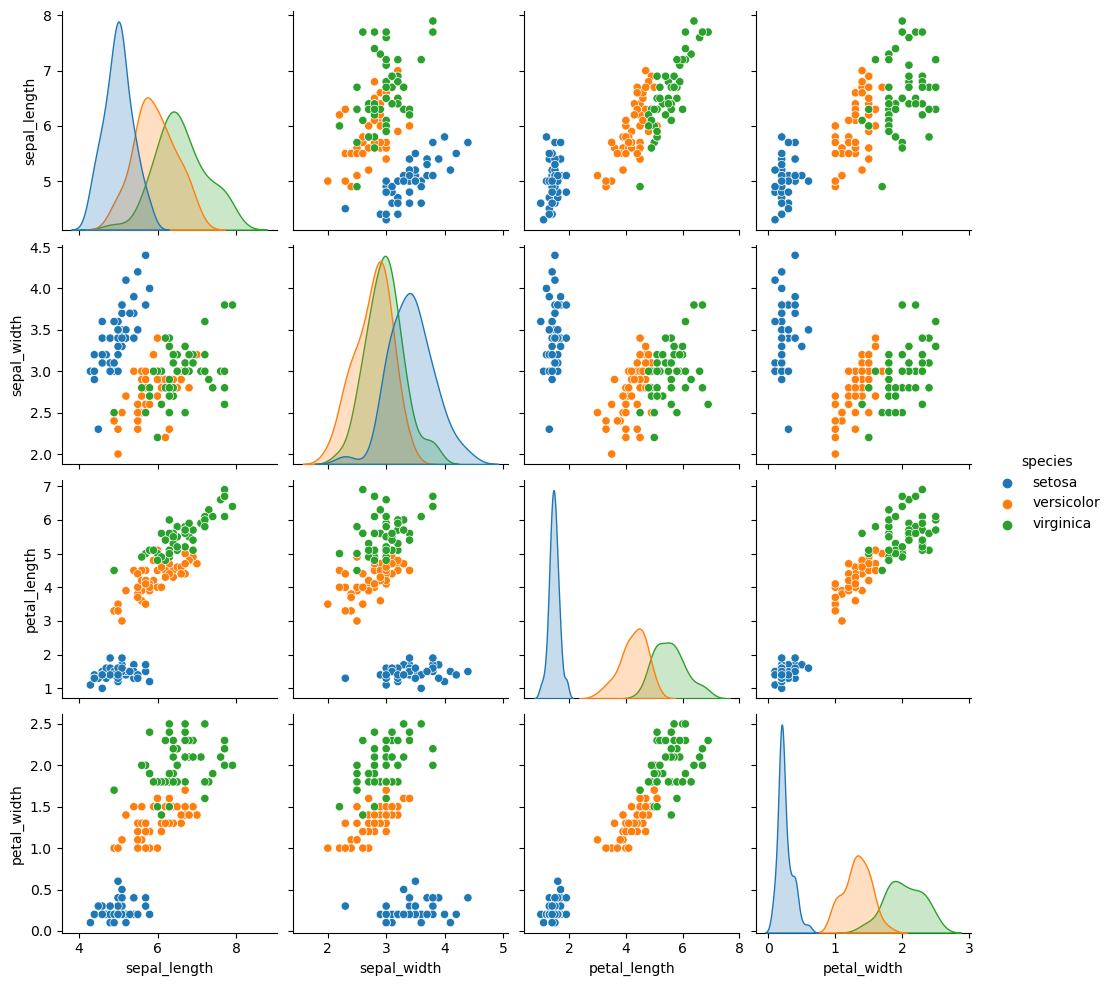

In [19]:
sns.pairplot(df, hue='species')
plt.show()

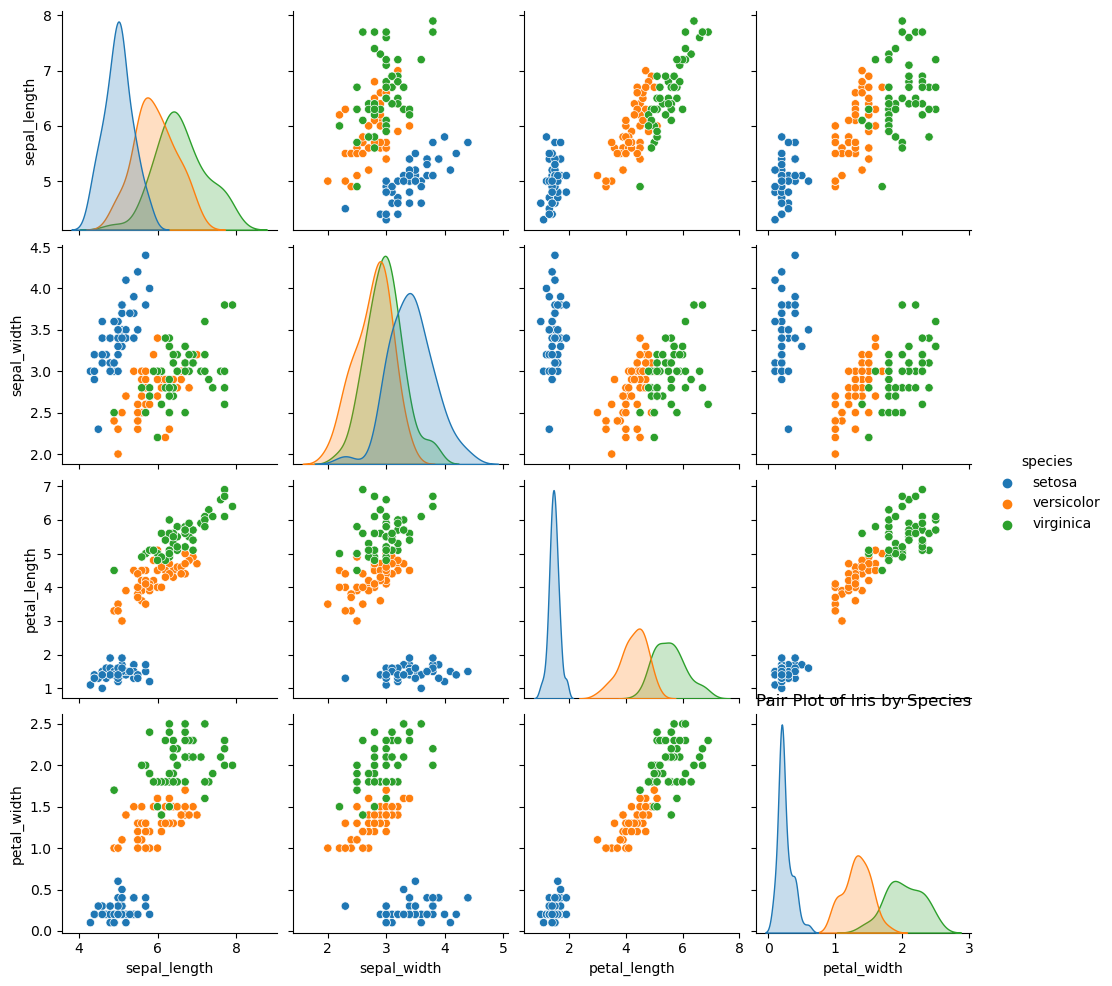

In [20]:
# 위 데이터에서 타이틀 설정
sns.pairplot(df, hue='species')
plt.title('Pair Plot of Iris by Species')
plt.show()

그 결과, 이상한 위치에 타이틀이 설정됨

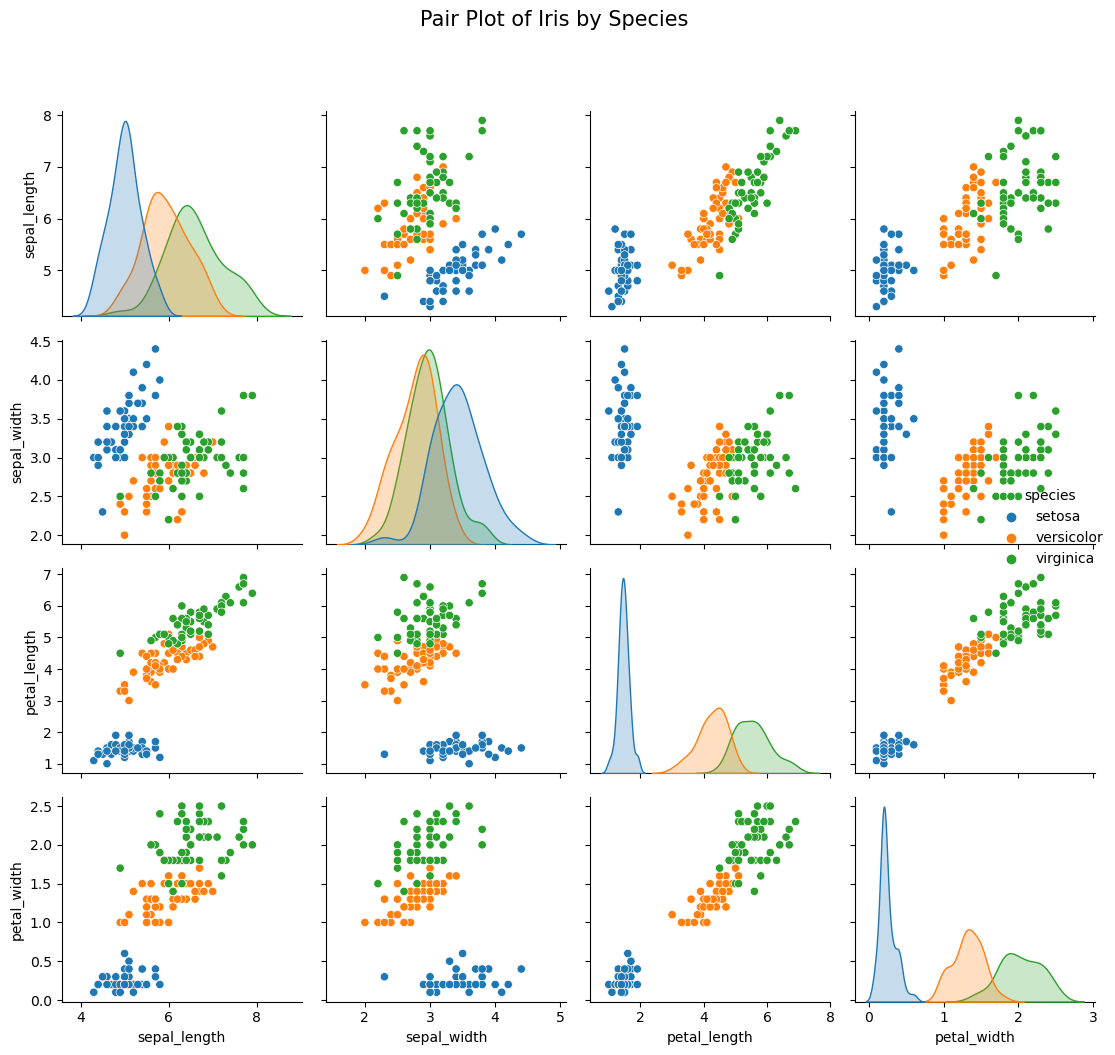

In [21]:
# 정상적으로 타이틀을 설정하는 방법
# 1. pairplot을 plot 이라는 변수에 할당
plot = sns.pairplot(df, hue='species')

# 2. fig.suptitle 기능 활용
plot.fig.suptitle('Pair Plot of Iris by Species', y=1.05, fontsize=15) # y값을 주어 타이틀의 위치를 조정할 수 있음
plt.tight_layout()
plt.show()

pairplot은 강력한 기능이나, 모든 상황에서 사용할 수 있는 것은 아님

실수형 변수가 더 많은 경우라면(e.g. 10개, 20개, 100개, …), <span style="background-color:#F1F8FF">figure</span>에 모든 정보를 담기 힘들며, 연산 시간이 길어질 것임.

결국 가독성이 떨어지는 그래프가 나오거나, 알아보기 불가능한 그래프, 또는 메모리 부족과 같은 문제가 발생하게 됨

### <span style="background-color:#F1F8FF">seaborn</span>의 <span style="background-color:#F1F8FF">hitmap</span>
히트맵(<span style="background-color:#F1F8FF">hitmap</span>)은 말 그대로 heat + map을 의미하며 빈도에 따라 뜨거움의 정도를 맵에 색상으로 표현하는 기능

2차원 카테고리 데이터를 다룰때 매우 유용하며, 한번에 많은 수치형 변수들의 상관관계를 시각화할 때도 유용하다.